**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True) 

Mounted at /content/gdrive


In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 1s (235 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 155047 files and directories currently installed.)
Preparing to 

In [ ]:
!pip install pyaudio

  Created wheel for pyaudio: filename=PyAudio-0.2.11-cp37-cp37m-linux_x86_64.whl size=52614 sha256=87f8d786c1950d0bbdcb59257fdd7ee60cf3a9bb4e9feb62262b614d56b0ca62
  Stored in directory: /root/.cache/pip/wheels/40/2e/4c/b71e7e96c861a46e6213bc6bb482b94dcf293a92c5e736c1ec
Successfully built pyaudio


In [ ]:
!pip install soundfile

In [ ]:
import os

In [ ]:
p="/content/gdrive/MyDrive/Colab Notebooks/audio_database"
os.chdir(p)
class_count = len(os.listdir(p))
print(class_count)

24


In [ ]:
import librosa
from librosa import display
import matplotlib.pyplot as plt

**Plotting the audio file which was just loaded by librosa using waveplot function of librosa.The Function librosa.display.waveplot plots the amplitude envelope of a waveform.**

In [ ]:
#Neutral_Emotion
p="/content/gdrive/MyDrive/Colab Notebooks/audio_database/Actor_01/03-01-01-01-02-01-01.wav"
data, sr=librosa.load(p)

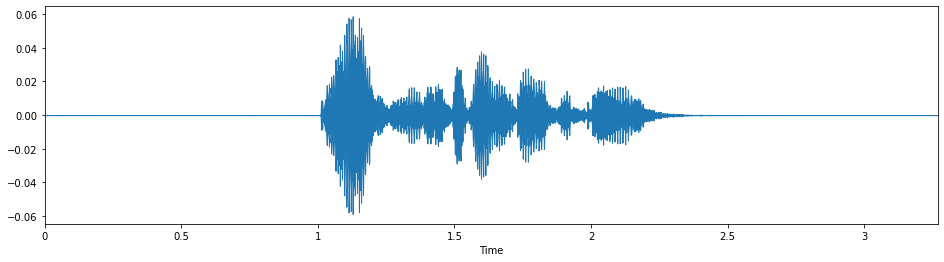

In [ ]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(data, sr=sr)

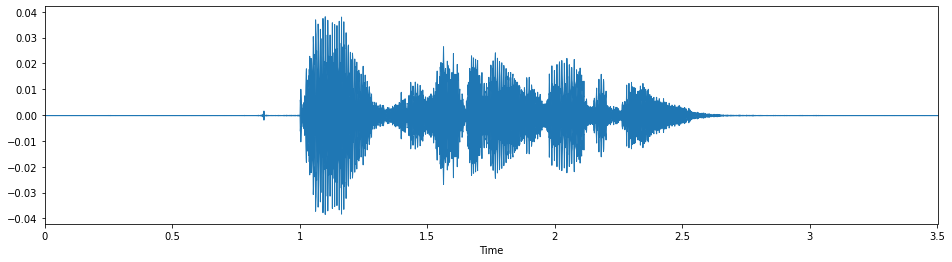

In [ ]:
#Calm Emotion
p="/content/gdrive/MyDrive/Colab Notebooks/audio_database/Actor_01/03-01-02-01-02-01-01.wav"
data1, sr1=librosa.load(p)
plt.figure(figsize=(16, 4))
librosa.display.waveplot(data1, sr=sr1)

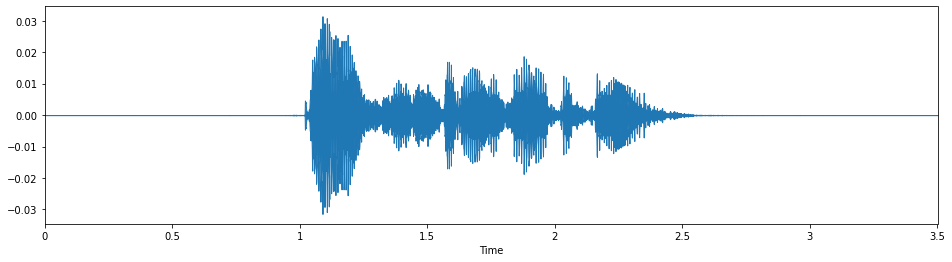

In [ ]:
#Sad Emotion
p="/content/gdrive/MyDrive/Colab Notebooks/audio_database/Actor_01/03-01-04-01-02-01-01.wav"
data2, sr2=librosa.load(p)
plt.figure(figsize=(16, 4))
librosa.display.waveplot(data2, sr=sr2)

In [ ]:
import soundfile
import  glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

### Defining a Function extract_feature to extract features such as mfcc,chroma, mel from the audio file. 

In [ ]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        #n_mfcc  - number of MFCCs to return
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [ ]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
# Emotions to observe
observed_emotions=['neutral','calm','happy','sad','angry','fearful', 'disgust','surprised']

**Loading The Data and extracting features for each audio file**

In [ ]:
def load_data(test_size):
    x,y=[],[]
    for file in glob.glob('/content/gdrive/MyDrive/Colab Notebooks/audio_database/Actor_*/*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    for file in glob.glob('/content/gdrive/MyDrive/Colab Notebooks/audio_song_database/Actor_*/*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)    
    return train_test_split(np.array(x), y, test_size=test_size, train_size= 0.75,random_state=9)

**Splitting The Data Into Training And Testing**

In [ ]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
#Observing the shape of the training and testing dataset
print((x_train.shape[0], x_test.shape[0]))

(1839, 613)


#**MLP Classifier**

In [ ]:
model=MLPClassifier(alpha=0.05, batch_size=20, epsilon=1e-07, hidden_layer_sizes=(200,), learning_rate='adaptive', max_iter=400)

In [ ]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.05, batch_size=20, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-07,
              hidden_layer_sizes=(200,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#**Predicting The Accuracy Of Model**

In [ ]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 69.17%


In [ ]:
y_pr_tr = model.predict(x_train)
tr_acc = float(accuracy_score(y_train,y_pr_tr))*100
print("----training accuracy score %s ----" % tr_acc)

----training accuracy score 92.6046764545949 ----


#**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print (matrix)

[[83  0  4  3  3  0  0  1]
 [ 3 61  1  1 19  3  8  2]
 [ 3  2 22  4  5  0  6  5]
 [ 3  0  3 58 11  2 20  1]
 [ 7  3  1  2 78  0  4  1]
 [ 2  4  0  2  0 16  5  4]
 [ 1  4  5  6  3  2 73  1]
 [ 3  0  4  4  3  1  4 33]]
